In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

## Loading the dataset using numpy

Full disclosure, I have not worked with the MNIST / Fashion MNIST dataset before, but on quick googling I found the below solutions.

### Loading the images

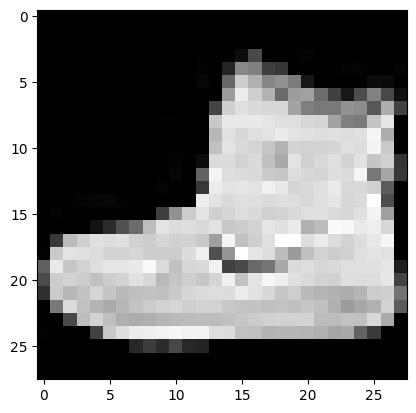

In [ ]:
def read_images_idx(filename):
    with open(filename, 'rb') as f:
        # Read the magic number
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        
        # # Ensure it's an IDX file
        if magic_number != 2051:
            raise ValueError("Invalid IDX file: Magic number mismatch")
        
        # Read the number of images, rows, and columns
        num_images = int.from_bytes(f.read(4), byteorder='big')
        num_rows = int.from_bytes(f.read(4), byteorder='big')
        num_cols = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the image data
        image_data = np.frombuffer(f.read(), dtype=np.uint8)
        image_data = image_data.reshape(num_images, num_rows, num_cols)
        
        return image_data

# Reading the file
file_path = 'data/images-idx3-ubyte'
images = read_images_idx(file_path)

# Display the first image
plt.imshow(images[0], cmap='gray')
plt.show()

### Loading the labels

In [ ]:
def read_labels_idx(filename):
    with open(filename, 'rb') as f:
        # Read the magic number
        magic_number = int.from_bytes(f.read(4), byteorder='big')
        
        # Ensure it's an IDX file for labels
        if magic_number != 2049:
            raise ValueError("Invalid IDX file: Magic number mismatch for labels")
        
        # Read the number of labels
        num_labels = int.from_bytes(f.read(4), byteorder='big')
        
        # Read the label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        
        return labels

# Reading the data
labels_file_path = 'data/labels-idx1-ubyte'
labels = read_labels_idx(labels_file_path)

print("First 10 labels:", labels[:10])

First 10 labels: [9 0 0 3 0 2 7 2 5 5]


## Loading the dataset using CSV and Pandas

(This is not something I had to Google)

In [ ]:
df = pd.read_csv("data/data.csv")

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


From `df.head()` and `df.info()` we can understand that this file `data.csv` contains 785 columns, the first column holding the label for the images and the remaining 784 columns reach corresponding to the value of a pixel.

In [5]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


Text(0.5, 1.0, '2')

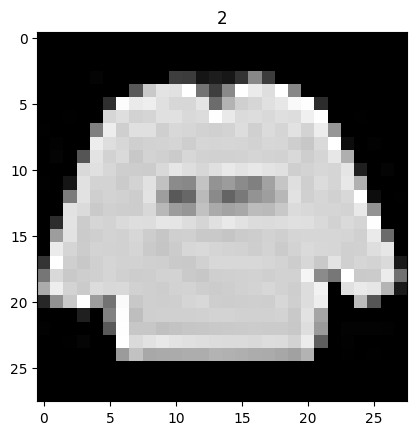

In [6]:
# Creating a numpy array of images and labels from the dataset
labels = df['label'].values     # Get the values of "df.label" converted to a numpy array
images = df.drop('label', axis=1).values.reshape(-1, 28, 28)    # Drop the "label" column, get the remaining values in a numpy array and reshape it

# Plot the first images and get it's label
plt.imshow(images[0], cmap='gray')
plt.title(labels[0])

From the official GitHub repo of the dataset, here is the mapping for each label:

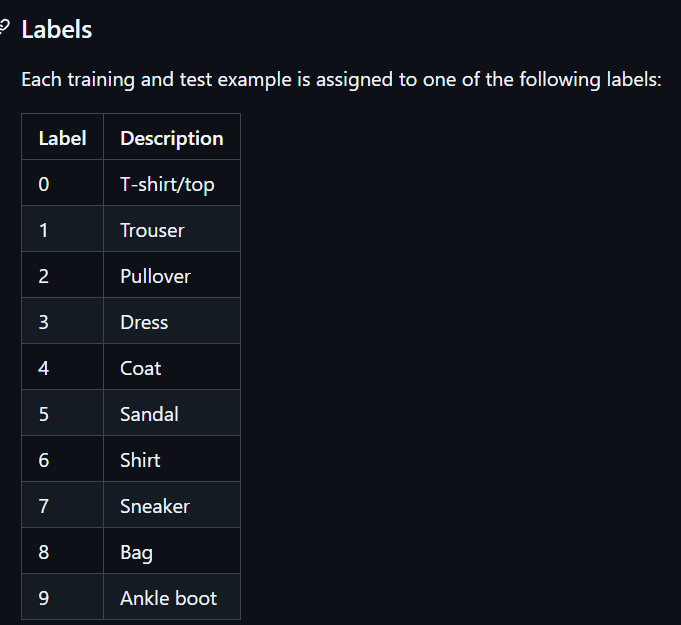

So, the image above is of a Pullover.


## Plotting multiple images

In [10]:
label_mappings = {
    0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
    5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"
}

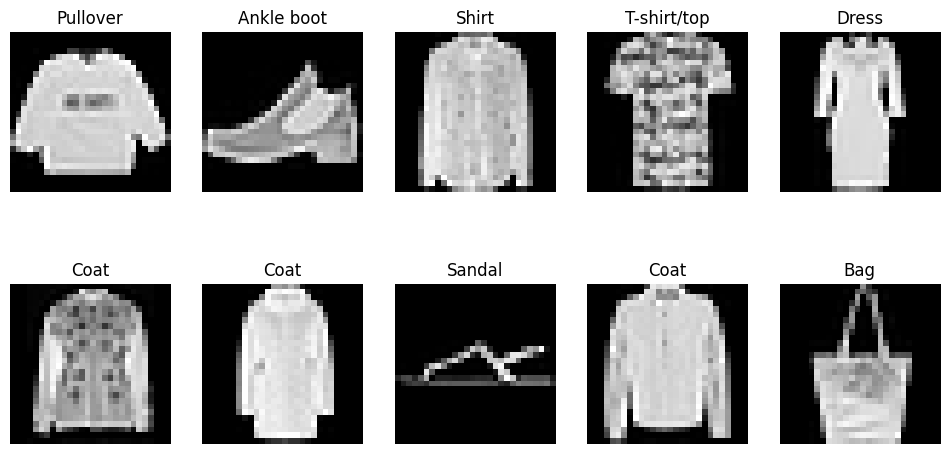

In [16]:
fix, ax = plt.subplots(2, 5, figsize=(12, 6))
ax = ax.flatten()

for i in range(10):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(label_mappings[labels[i]])
    ax[i].axis("off")

## Verifying Grayscale format of an image

In [20]:
img_arr = images[0]
lbl = labels[0]

img_arr.shape, lbl

((28, 28), 2)

In [ ]:
# Loading the array as a PIL.Image
img = Image.fromarray(np.uint8(img_arr))    # Here, we are able to do it this simply because `img_arr` is in range 0-255
img

In [30]:
# Checking the format of the image
img.mode

'L'

From official PIL documentation, here is a list of the modes in pillow:

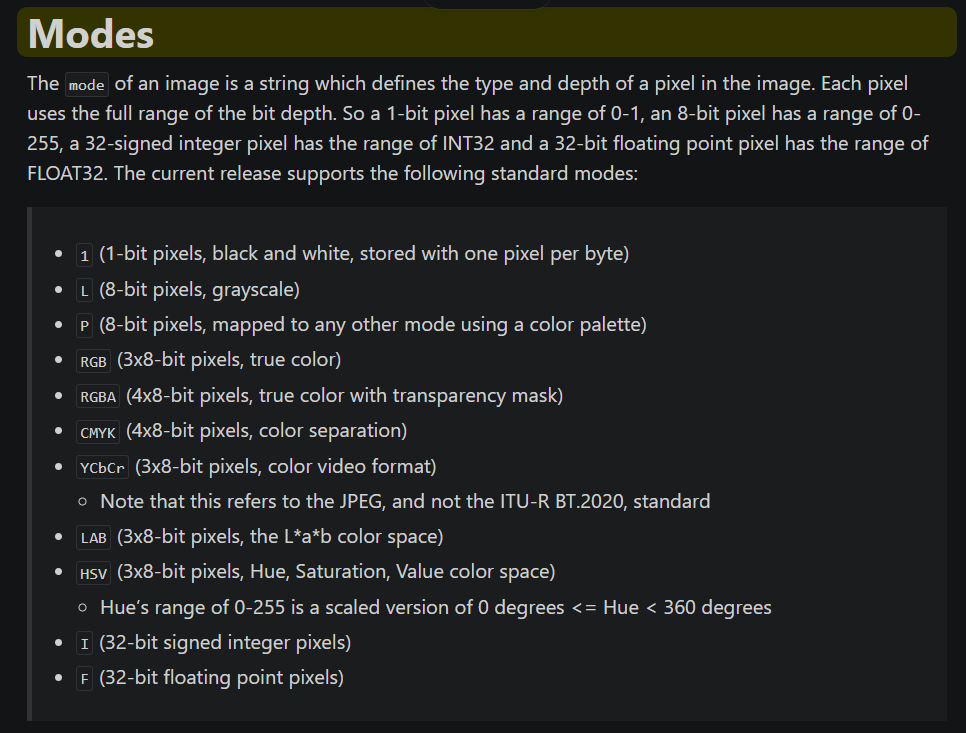

Since the mode of our sample image is "L", this means that the image is of a Grayscale format.

Another way of verifying it was how we've been checking the dimensions of the image and the image array. If an image has 2 dimensions only, it is of the Grayscale format. RGB images have a 3D format, with (height, width, 3) where 3 specifies the number of different colour channels.